<a href="https://colab.research.google.com/github/MartinSantaGitHub/curso-estadistica-multivariante/blob/master/Tareas/tarea_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sc
from scipy.spatial import distance
from plotnine import *
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/MartinSantaGitHub/curso-estadistica-multivariante/master/Datos/companies79.csv')

In [3]:
df.rename(columns = {'V1' : 'Name', 
                     'V2' : 'Goods',
                     'V3': 'Sells',
                     'V4': 'MarketValue',
                     'V5' : 'Profits',
                     'V6' : 'CashFlow',
                     'V7' : 'Employees',
                     'V8' : 'Department'}, inplace = True)

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df['Department'] = df['Department'].astype('category')
df['Name'] = df['Name'].astype('string')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         79 non-null     string  
 1   Goods        79 non-null     int64   
 2   Sells        79 non-null     int64   
 3   MarketValue  79 non-null     int64   
 4   Profits      79 non-null     float64 
 5   CashFlow     79 non-null     float64 
 6   Employees    79 non-null     float64 
 7   Department   79 non-null     category
dtypes: category(1), float64(3), int64(3), string(1)
memory usage: 4.9 KB


In [6]:
Xf = df.iloc[:,1:7]
Xf.head()

,Goods,Sells,MarketValue,Profits,CashFlow,Employees
0,19788,9084,10636,1092.9,2576.8,79.4
1,5074,2557,1892,239.9,578.3,21.9
2,13621,4848,4572,485.0,898.9,23.4
3,1117,1038,478,59.7,91.7,3.8
4,1633,701,679,74.3,135.9,2.8


In [7]:
Xlog = Xf.apply(np.log10, axis = 1)
Xlog.head()

,Goods,Sells,MarketValue,Profits,CashFlow,Employees
0,4.296402,3.958277,4.026778,3.038580,3.411081,1.899821
1,3.705350,3.407731,3.276921,2.380030,2.762153,1.340444
2,4.134209,3.685563,3.660106,2.685742,2.953711,1.369216
3,3.048053,3.016197,2.679428,1.775974,1.962369,0.579784
4,3.212986,2.845718,2.831870,1.870989,2.133219,0.447158


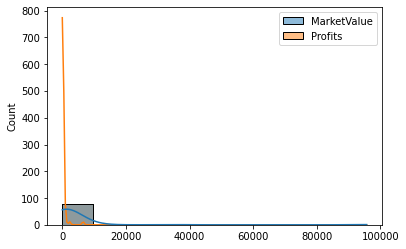

In [16]:
cols = ["MarketValue","Profits"]
sns.histplot(Xf[cols],bins=10, kde = True)
plt.show()

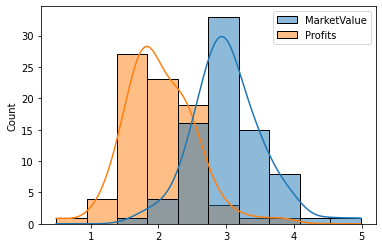

In [20]:
sns.histplot(Xlog[cols],bins=10, kde = True, alpha = 0.5)
plt.show()

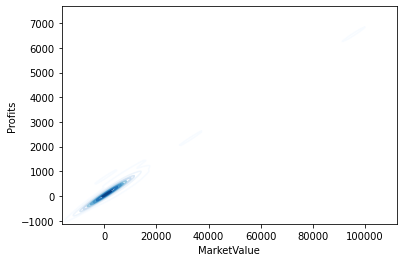

In [25]:
V4 = Xf["MarketValue"]
V5 = Xf["Profits"]
sns.kdeplot(x = V4, y = V5, cmap="Blues", shade=True)
plt.show()

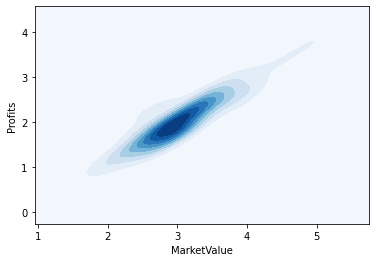

In [34]:
V4 = Xlog["MarketValue"]
V5 = Xlog["Profits"]
sns.kdeplot(x = V4, y = V5, cmap="Blues", shade=True, thresh=0)
plt.show()

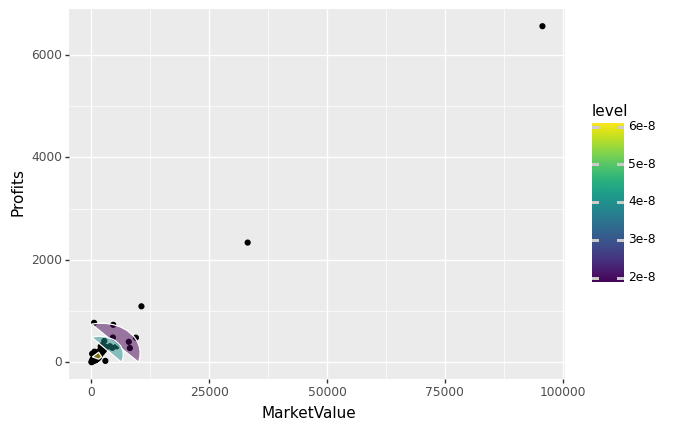

<ggplot: (8763500759397)>

In [79]:
ggplot(aes(x = "MarketValue", y = "Profits"), Xf) + geom_point() + stat_density_2d(aes(fill = '..level..'), geom = "polygon", colour="white", alpha = 0.5)

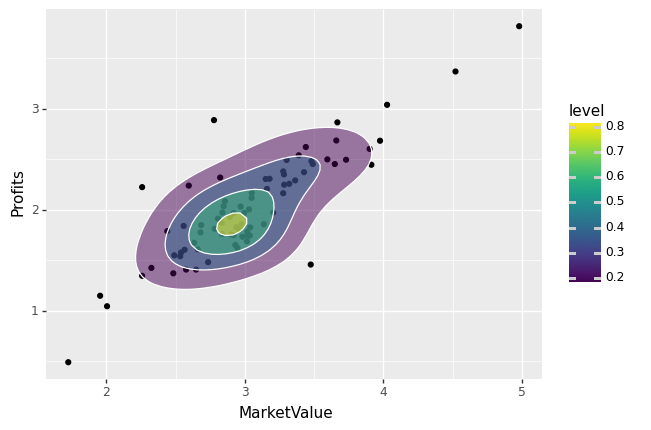

<ggplot: (8763500577741)>

In [80]:
ggplot(aes(x = "MarketValue", y = "Profits"), Xlog) + geom_point() + stat_density_2d(aes(fill = '..level..'), geom = "polygon", colour="white", alpha = 0.5)

In [96]:
means = Xf.mean()
means

Goods          5940.531646
Sells          4178.291139
MarketValue    3269.746835
Profits         268.289873
CashFlow        433.455696
Employees        37.597468
dtype: float64

In [97]:
cov_matrix = Xf.cov()
cov_matrix

,Goods,Sells,MarketValue,Profits,CashFlow,Employees
Goods,8.384669e+07,4.792604e+07,7.061177e+07,5.134333e+06,7.714471e+06,351058.228286
Sells,4.792604e+07,4.916300e+07,6.965774e+07,4.871604e+06,7.474929e+06,417925.918695
MarketValue,7.061177e+07,6.965774e+07,1.277701e+08,8.696087e+06,1.320104e+07,596582.740377
Profits,5.134333e+06,4.871604e+06,8.696087e+06,6.068672e+05,9.185365e+05,40331.062538
CashFlow,7.714471e+06,7.474929e+06,1.320104e+07,9.185365e+05,1.425817e+06,61578.388348
Employees,3.510582e+05,4.179259e+05,5.965827e+05,4.033106e+04,6.157839e+04,4160.792045


In [ ]:
mahalanobis_dist = []
means_values = means.values
Sx_inv = np.linalg.inv(cov_matrix)
Sx_inv

for i in range(Xf.shape[0]):
  mahalanobis_dist.append(distance.mahalanobis(Xf.iloc[i,:],means_values,Sx_inv))

mahalanobis_dist

In [ ]:
np.sort(mahalanobis_dist)[::-1]

In [159]:
p = len(Xf.columns)
dist_limit = sc.chi2.ppf(1 - 0.95, p)
dist_limit

1.6353828943279072

In [ ]:
df[mahalanobis_dist > dist_limit]

In [ ]:
pd.unique(df[mahalanobis_dist > dist_limit].loc[:,["Department"]].values.flatten())

In [161]:
max(mahalanobis_dist)

8.432552426400717

In [162]:
df[mahalanobis_dist == max(mahalanobis_dist)]

,Name,Goods,Sells,MarketValue,Profits,CashFlow,Employees,Department
39,IBM,52634,50056,95697,6555.0,9874.0,400.2,HiTech


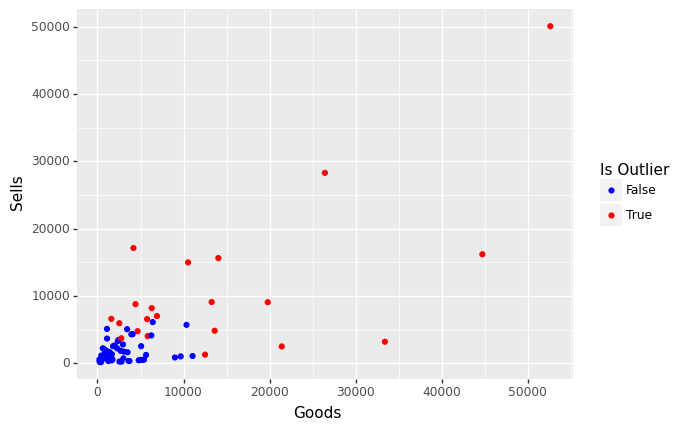

<ggplot: (8763498369357)>

In [181]:
Xf['maha_dist'] = mahalanobis_dist
Xf['is_outlier'] = Xf['maha_dist'] > dist_limit

ggplot(aes(x = "Goods", y = "Sells"), Xf) + geom_point(aes(color = "is_outlier")) + scale_colour_manual(name = 'Is Outlier', values = ['blue','red'])

In [188]:
out = Xf[mahalanobis_dist > dist_limit].index
Xclean = Xf.drop(out)
Xclean.head()

,Goods,Sells,MarketValue,Profits,CashFlow,Employees,maha_dist,is_outlier
1,5074,2557,1892,239.9,578.3,21.9,1.444434,False
3,1117,1038,478,59.7,91.7,3.8,0.802333,False
4,1633,701,679,74.3,135.9,2.8,0.756586,False
5,5651,1254,2002,310.7,407.9,6.2,1.551584,False
7,3494,1653,1442,160.9,320.3,6.4,0.745775,False


In [189]:
print(Xclean.mean())
print(Xf.mean())

Goods          2791.758621
Sells          1758.344828
MarketValue     993.879310
Profits         101.441379
CashFlow        172.125862
Employees        15.668966
maha_dist         0.978244
is_outlier        0.000000
dtype: float64
Goods          5940.531646
Sells          4178.291139
MarketValue    3269.746835
Profits         268.289873
CashFlow        433.455696
Employees        37.597468
maha_dist         1.747085
is_outlier        0.265823
dtype: float64


In [ ]:
Xclean = Xclean.iloc[:,0:6]
means = Xclean.mean()
cov_matrix = Xclean.cov()

mahalanobis_dist = []
means_values = means.values
Sx_inv = np.linalg.inv(cov_matrix)
Sx_inv

for i in range(Xclean.shape[0]):
  mahalanobis_dist.append(distance.mahalanobis(Xclean.iloc[i,:],means_values,Sx_inv))

mahalanobis_dist

In [ ]:
# El límite de la distancia se conserva ya que tenemos la misma cantidad de variables.
p = len(Xclean.columns)
dist_limit = sc.chi2.ppf(1 - 0.95, p)
dist_limit

In [196]:
len(Xclean[mahalanobis_dist > dist_limit])

33